In [1]:
import numpy as np
import math

# FUNCIONES
# !pip install import_ipynb
# !pip show import_ipynb
import import_ipynb
import G360_Function as func # Assuming G360_Function.ipynb is in the same directory

import G360_Parameter as param

# !pip install nbimporter
# !pip show nbimporter
    # import nbimporter
    # import G360_Function as func
# import fff as func

In [3]:
# FORMATO PARA MANEJO DE VECTORES
class FReaction(np.ndarray):
    def __new__(cls, f_v, f_x=None, f_y=None):
        if (f_x != None) & (f_y != None):
            obj = np.array([f_v, f_x, f_y], dtype=float).view(cls)
        else:
            obj = np.array(f_v, dtype=float).view(cls)
        return obj

    # def __init__(self, f_v, f_x = None, f_y = None):
    #     if isinstance (f_v, list) and len(f_v) == 3:
    #         self._lista_array = np.array(f_v)
    #     else:        
    #         self._lista_array = np.array([f_v, f_x, f_y])

    def __str__(self):
        return repr(self)

    @property
    def F_vert(self):
        return self[0]

    @property
    def F_x_long(self):
        return self[1]

    @property
    def F_y_transv(self):
        return self[2]

    # Sobrescribimos __getattr__ para ocultar los atributos de numpy
    # def __getattr__(self, name):
    #     if name in ['F_vert', 'F_long', 'F_transv']:
    #         return super().__getattr__(name)
    #     raise AttributeError(f"'{type(self).__name__}' object has no attribute '{name}'")

    # # Sobrescribimos dir() para mostrar solo las propiedades que definimos
    # def __dir__(self):
    #     # Solo mostrar las propiedades definidas por nosotros, no las de numpy
    #     return ['F_vert', 'F_long', 'F_transv']


#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#
# eg REACCIONES
#DIAGONAL DIR PATA
FC_diag = [-800, +12, +23]
FT_diag = [+650, -15, +10]
Fl_diag = [+000, +30, -20]
Ft_diag = [+200, -10, -35]
FR_diag = FReaction([FC_diag, FT_diag, Fl_diag, Ft_diag])

#ORTOGONAL
FC_ort = [-730, +25, +50]
FT_ort = [+600, -30, +20]
Fl_ort = [+000, +60, -40]
Ft_ort = [+150, -20, -70]
FR_ort = FReaction([FC_ort, FT_ort, Fl_ort, Ft_ort])

### ZAPATA AISLADA

In [5]:
# eg INPUTS PRELIMINARES
input_Cohesion = 30
input_Sigma_adm = 150
input_Gamma_suelo = 16.2
# input_Gamma_suelo_arranc = input_Gamma_suelo
input_Phi = math.radians(30)
input_Comportamiento_suelo = 'GRANULAR' # GRANULAR O COHESIVO

#inputs opcionales
inputOP_Betha = input_Phi *2/3
inputOP_Gamma_concr = 24
# inputOP_Gamma_concr_arranc = inputOP_Gamma_concr
inputOP_Gamma_suelo_rell = input_Gamma_suelo
inputOP_fy = 420
inputOP_fprimac = 21
inputOP_Prof_Desprecio = 0.6
inputOP_recub_ped = 5/100
inputOP_recub_disenho = 5/100
input_pedestales_lista = [0.25, 0.5, 0.75, 1]

#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#
# OBJETO PARA CIMENTACIÓN TIPO ZAPATA AISLADA
# 0 -> Cuadrado   1 -> Circular
GeometriaPedestal = 0 

class CimentacionZapata(): #PARA LA CUÑA, HACE FALTA ANG \ALPHA Y DIMENSIÓN DE LA CUÑA
    def __init__(self, AP_AlturaPedestal, P_Profundidad, A_Ancho, EP_EspesorPedestal, E_EspesorZap):
        self._AP_AlturaPedestal = AP_AlturaPedestal
        self._P_Profundidad = P_Profundidad
        self._A_Ancho = A_Ancho
        self._EP_EspesorPedestal = EP_EspesorPedestal
        self._E_EspesorZap = E_EspesorZap

####
# PROPIEDADES
    @property
    def g_prof_pedestal(self):
        return self._P_Profundidad - self._E_EspesorZap
    @property
    def g_prof_zapata(self):
        return self._P_Profundidad
        
    @property
    def g_ancho_pedestal(self):
        return self._EP_EspesorPedestal
    @property
    def g_ancho_zapata(self):
        return self._A_Ancho

    @property
    def g_esp_zapta(self):
        return self._E_EspesorZap    




    
####
# GEOMETRÍA Y CANTIDADES
    def volumen_concr(self):
        self._secc_ped = self._EP_EspesorPedestal**2 if GeometriaPedestal == 0 else math.pi * (self._EP_EspesorPedestal/2)**2
        self._volumen_concr = self._A_Ancho**2 * self._E_EspesorZap + self._secc_ped * (self._AP_AlturaPedestal + self._P_Profundidad - self._E_EspesorZap)
        return self._volumen_concr

    def volumen_excavacion(self):
        self._volumen_excavacion = self._A_Ancho**2 * self._P_Profundidad
        return self._volumen_excavacion

    def volumen_relleno(self):
        self._volumen_relleno = self.volumen_excavacion() - (self.volumen_concr() - self._secc_ped * self._AP_AlturaPedestal)
        return self._volumen_relleno

    # def volumen_suelo_aportante(self):
    #     return self.volumen_relleno()

    def volumen_cono(self):
        self._R0_cono = self._P_Profundidad * math.tan(inputOP_Betha)
        self._volumen_cono = func.troncopiramidal(self._A_Ancho**2, 
                                                  (self._A_Ancho + 2 * self._R0_cono)**2, 
                                                  self._P_Profundidad) - ( self._A_Ancho**2 * self._P_Profundidad)
        return self._volumen_cono

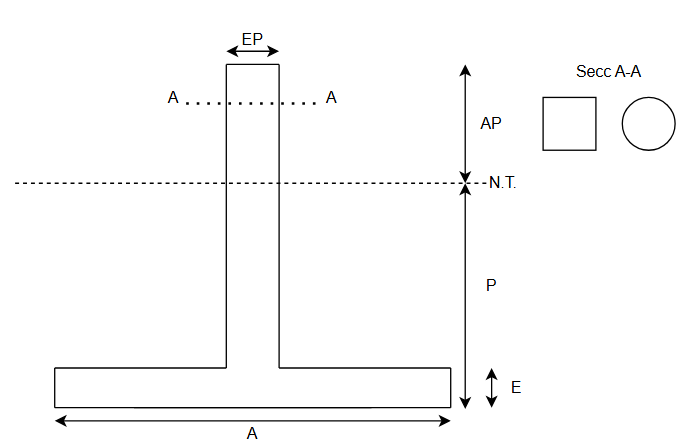

In [7]:
_A = 2.4
_P = 3
_AP  = 1
_EP = .5
_E = .4

z1 = CimentacionZapata(_AP, _P, _A, _EP, _E)

### ZAPATA CUÑA

In [59]:
# IMPORTADO PARA SUELOS EN LA CLASIFICIACIÓN DENTRANSELEC
tipo_de_suelo = '2'
dic_suelo = param.SUELOS_CHILE[str(tipo_de_suelo)]

#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#
input_Cohesion = dic_suelo['C']
input_Sigma_adm = dic_suelo['CapAdm']
input_Gamma_suelo = dic_suelo['SueloAplast']
input_Gamma_suelo_arranc = dic_suelo['SueloArranc']
input_Phi = math.radians(dic_suelo['phi'])

#inputs opcionales
inputOP_Betha = math.radians(dic_suelo['betha'])
inputOP_Gamma_concr = dic_suelo['ConcrAplast']
inputOP_Gamma_concr_arranc = dic_suelo['ConcrArranc']
inputOP_Gamma_suelo_rell = input_Gamma_suelo
inputOP_fy = 420
inputOP_fprimac = 21
inputOP_Prof_Desprecio = 0.6
inputOP_recub_ped = 5/100
inputOP_recub_disenho = 5/100
input_pedestales_lista = [0.25, 0.5, 0.75, 1]

#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#═══#
# OBJETO PARA CIMENTACIÓN ZAPATA TIPO CUÑA

class CimentacionCunha():
    def __init__(self, AP_AlturaPedestal, P_Profundidad, A_Ancho, EP_EspesorPedestal, E_EspesorZap, Hy_DesnivelIncl, 
                 Hx_DesnivelIncl = None, Alpha_AngIncl = None, F_ProfundidadCunha = None, Cunha = None):
        self._AP_AlturaPedestal = AP_AlturaPedestal
        self._P_Profundidad = P_Profundidad
        self._A_Ancho = A_Ancho
        self._EP_EspesorPedestal = EP_EspesorPedestal
        self._E_EspesorZap = E_EspesorZap
        self._Hy_DesnivelIncl = Hy_DesnivelIncl
        
        # DEFINICIÓN DE VARIABLES OPCIONALES
        self._Alpha_AngIncl = math.radians(60) if Alpha_AngIncl == None else math.radians(Alpha_AngIncl) #rads
        if Hx_DesnivelIncl == None:
            self._Hx_DesnivelIncl = func.mround_down( self._Hy_DesnivelIncl/math.tan(self._Alpha_AngIncl) , 5/100) #Redondear hacia abajo en multiplos de 5 cm
        else:
            self._Hx_DesnivelIncl = Hx_DesnivelIncl
            self._Alpha_AngIncl = math.atan(self._Hy_DesnivelIncl / self._Hx_DesnivelIncl)

        self._F_ProfundidadCunha = 0.3 if F_ProfundidadCunha == None else F_ProfundidadCunha

        # VARIABLES CALCULADAS
        self._EPinf_EspesorPedestal_inf = self._A_Ancho  - 2*self._Hx_DesnivelIncl
        self._Cunha_OP = ( self._EPinf_EspesorPedestal_inf - self._EP_EspesorPedestal) - func.proporcion(self._EPinf_EspesorPedestal_inf - self._EP_EspesorPedestal,
                                                                                                      max(input_pedestales_lista) + self._F_ProfundidadCunha + ( self._P_Profundidad - self._F_ProfundidadCunha)/3,
                                                                                                      max(input_pedestales_lista) + self._F_ProfundidadCunha)
        self._Cunha_OP = max(func.mround_down(self._Cunha_OP, 0.05), 10/100)
        self._Cunha = self._Cunha_OP if (Cunha == None) else Cunha
        self._Cunha_nvl_terreno = func.proporcion(self._EPinf_EspesorPedestal_inf - self._EP_EspesorPedestal - self._Cunha,
                                                 self._AP_AlturaPedestal + self._F_ProfundidadCunha,
                                                 self._AP_AlturaPedestal)
        
            
####
# GEOMETRÍA Y CANTIDADES
    def volumen_concr(self):
        self._v_losa = self._A_Ancho**2 * self._E_EspesorZap
        self._v_Incl = func.troncopiramidal(self._A_Ancho**2, self._EPinf_EspesorPedestal_inf**2, self._Hy_DesnivelIncl)
        self._v_cunha = self._EPinf_EspesorPedestal_inf**2 * (self._P_Profundidad - self._F_ProfundidadCunha - self._Hy_DesnivelIncl - self._E_EspesorZap)
        self._v_ped_cunha = func.troncopiramidal(self._EP_EspesorPedestal**2 , (self._EPinf_EspesorPedestal_inf - self._Cunha)**2, self._AP_AlturaPedestal + self._F_ProfundidadCunha)
        return self._v_losa + self._v_Incl + self._v_cunha + self._v_ped_cunha

    def volumen_excavacion(self):
        if self._Alpha_AngIncl >= math.radians(60):
            self._v_losa = self._A_Ancho**2 * self._E_EspesorZap
            self._v_Incl = func.troncopiramidal(self._A_Ancho**2, self._EPinf_EspesorPedestal_inf**2, self._Hy_DesnivelIncl)
            self._v_cunha = self._EPinf_EspesorPedestal_inf**2 * (self._P_Profundidad  - self._Hy_DesnivelIncl - self._E_EspesorZap)
            return self._v_losa + self._v_Incl + self._v_cunha
        else:
            return self._A_Ancho**2 * self._P_Profundidad
            
    def volumen_relleno(self):
        self._v_concr_enterrado = self.volumen_concr()- func.troncopiramidal(self._EP_EspesorPedestal**2, (self._EP_EspesorPedestal + self._Cunha_nvl_terreno)**2, self._AP_AlturaPedestal)
        return self.volumen_excavacion() - self._v_concr_enterrado

    def volumen_suelo_aportante(self):
        self.volumen_relleno()
        return (self._A_Ancho**2 * self._P_Profundidad) - self._v_concr_enterrado

    def volumen_cono(self):
        self._R0_cono = self._P_Profundidad * math.tan(inputOP_Betha)
        return func.troncopiramidal(self._A_Ancho**2,
                                   (self._A_Ancho + 2*self._R0_cono)**2,
                                   self._P_Profundidad) - (self._A_Ancho**2 * self._P_Profundidad)

In [61]:
_A = 2.4
_P = 3
_AP  = 1
_EP = .5
_E = .4
_Hy = 0.5
# _Hx = None, _Alpha = None

z2 = CimentacionCunha(_AP, _P, _A, _EP, _E, _Hy)

### CHEQUEOS

In [143]:
# OBJETO PARA LOS CHEQUEOS UNIVERSALES EN LAS ZAPATAS
class ChequeoZapataACI(): # SE INGRESA EL OBJETO Y OBJETOS FReaction
    def __init__(self, Obj_Zap, reaccion_ortogonal, reaccion_diagonal):
        self._obj_Zap = Obj_Zap #obj
        self._ort =  func.abs_vectores(reaccion_ortogonal) #F([])
        self._diag = func.abs_vectores(reaccion_diagonal)  #F([])

        #REACCIONES VERTICALES
        self._peso_concreto = - np.array([self._obj_Zap.volumen_concr(), 0, 0]) * inputOP_Gamma_concr #[]
        self._peso_suelo = -(np.array([self._obj_Zap.volumen_relleno(), 0, 0]) +  
                            self._obj_Zap.volumen_cono() * func.casos_traccion(self._ort) ) * inputOP_Gamma_suelo_rell # ([])

        self._ort_RT = (self._ort +   # REACCIONES
                        self._peso_concreto  + # CONCRETO
                        self._peso_suelo ) # SUELO  # F([])

        
        # REACCIONES HORIZONTALES
        self._empuje_pasivo_ped  = func.empuje_pasivo(input_Gamma_suelo * z1.g_prof_pedestal, 0, 
                                                 z1.g_prof_pedestal * z1.g_ancho_pedestal, 3)/param.FS_EMPUJE_PERM  # EMPUJE PEDESTAL
        self._empuje_pasivo_ped  = np.array([0, self._empuje_pasivo_ped, self._empuje_pasivo_ped]) #[]
        self._empuje_pasivo_losa = func.empuje_pasivo(input_Gamma_suelo * z1.g_prof_pedestal, input_Gamma_suelo * z1.g_prof_zapata,
                                                 z1.g_esp_zapta * z1.g_ancho_zapata, 3)/param.FS_EMPUJE_PERM  # EMPUJE LOSA INF
        self._empuje_pasivo_losa = np.array([0, self._empuje_pasivo_losa, self._empuje_pasivo_losa]) #[]

        
        self._friccion_base = -self._ort_RT[:,0] * math.tan(input_Phi)/param.FS_FRICCION_PERM
        self._friccion_base = np.array([[0,0,0,0], self._friccion_base, self._friccion_base  ]).T #([])
        self._cohesion_base = self._obj_Zap.g_ancho_zapata **2 * input_Cohesion / param.FS_COHESION_PERM
        self._cohesion_base = np.array([0, self._cohesion_base, self._cohesion_base]) #[]
        self._reaccion_base = self._friccion_base if input_Comportamiento_suelo == 'GRANULAR' else self._cohesion_base 

        self._ort_RT = (self._ort   * np.array([1,-1,-1])+   # REACCIONES
                        self._empuje_pasivo_ped + self._empuje_pasivo_losa  + # EMPUJE PASIVO DEL SUELO
                        self._reaccion_base ) # APORTE POR FRICCION Y COHESIÓN   # F([])
        
####
# CHEQUEOS PARA TRACCIÓN
    def FS_arranc(self):
        _fuerzas_traccion = self._ort * func.casos_traccion(self._ort) #F([])
        return ["comp" if self._ort[i].F_vert <= 0 else abs(self._ort_RT[i].F_vert - _fuerzas_traccion[i].F_vert)/_fuerzas_traccion[i].F_vert for i in range(4)]
    def FS_arranc_Boole(self):
        return func.min_(self.FS_arranc()) >= param.FS_ARRANC
#
    def FS_vuelco(self):
        1
    def FS_vuelco_Boole(self):
        1
#
    def FS_deslizamiento(self):
        _reacciones_fx_fy = self._ort_RT[:, (1,2)]
        _minima_reaccion_fx_fy = min([j for i in _reacciones_fx_fy for j in i])
        if _minima_reaccion_fx_fy == 0:
            return [param.FS_DESLIZAM for i in range(4)]
        elif _minima_reaccion_fx_fy < 0:
            return [0 for i in range(4)]
        else:
            _FS_matriz = (self._ort_RT + self._ort)[:, (1,2)] / (self._ort)[:, (1,2)]
            return [min(i) for i in _FS_matriz]
    def FS_deslizamiento_Boole(self):
        return func.min_(self.FS_deslizamiento()) >= param.FS_DESLIZAM

Disenho = ChequeoZapataACI(z1, FR_ort, FR_diag)

`Suelo aportante para casos a tracción:`

\begin{align}
{Traccion} & = Relleno + Cono \\
{Compresion} & = Relleno
\end{align}

`def FS_arranc(self):`

\begin{align}
R = (-F↑) + F↑ & \\
\dfrac{F↓}{F↑} & \ge 1.5 \\
\dfrac{(-F↑)}{F↑} & \le 1.5 \\
\dfrac{R - F↑}{F↑} & \le 1.5 
\end{align}

$(-F↑)$ = Fuerzas a compresión (Suelo y concreto)

$F↑$ = Reacción vertical

`FS_deslizamiento`
\begin{align}
R = (F_{kp} + F_{base}) + F_{x, y} & \\
\dfrac{F_{resistentes}}{F_{horizontales}} & \ge 1.5 \\
\dfrac{R - F_{x, y}}{F_{x, y}} & \ge 1.5
\end{align}



$F_{kp}$  Resistencia del empuje pasivo del suelo

$F_{base}$ Reacción en la base generada por la fricción o cohesión

In [145]:
Disenho.FS_deslizamiento()

[9.061904214691781, 2.298570592921061, 2.8686346621495202, 3.459459979207422]

In [147]:
Disenho.FS_deslizamiento_Boole()

True

In [127]:
qq = (Disenho._ort_RT + Disenho._ort)[:, (1,2)] / (Disenho._ort)[:, (1,2)]
# [min(i.F_x_long, i.F_y_transv) for i in _FS_matriz]
qq
min([j for i in qq for j in i])

2.298570592921061

In [90]:
(Disenho._ort_RT + Disenho._ort)[:, (1,2)]

FReaction([[453.09521073, 453.09521073],
           [ 68.95711779,  68.95711779],
           [172.11807973, 172.11807973],
           [242.16219854, 242.16219854]])

In [84]:
(Disenho._ort)[:, (1,2)]

FReaction([[25., 50.],
           [30., 20.],
           [60., 40.],
           [20., 70.]])

In [72]:
0/0

ZeroDivisionError: division by zero

In [ ]:
Disenho